# 지도학습 (2) - 회귀분석
단순 선령 회귀 분석으로 농어의 무게 예측

## #01. 작업준비
### 패키지 준비


In [3]:
import pandas as pd 
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sb

### 데이터 가져오기

In [6]:
origin= pd.read_excel('https://data.hossam.kr/F02/fish.xlsx')
origin.drop('Unnamed: 0',axis=1,inplace=True)
origin.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


## #02. 데이터 전처리
### 훈련데이터와 검증데이터 분할

- train 데이터 / 훈련데이터 : 모델을 생성하는데 사용되는 데이터
- test 데이터 / 검증데이터 : 모델이 얼마나 잘 만들어 졌는지 확인하기 위한 데이터

#### 데이터 프레임을 통쨰로 넣는 경우
데이터 프레임을 독립변수와 종속변수가 모두 포함되어 있는 형태

같은 유형으로 일정 비율로 분할된 두개의 데이터 프레임이 반환된다. 




In [51]:
train, test = train_test_split(origin, test_size=0.3, random_state=777)

In [52]:
train.head()

,길이,무게
8,19.6,85.0
0,8.4,5.9
15,22.0,120.0
26,24.6,188.0
51,42.0,1100.0


#### 데이터 프레임을 독립변수와 종속변수로 분리하여 사용하는 경우

In [11]:

x_train,x_test,y_train,y_test = train_test_split(origin[['길이']],origin[['무게']],test_size=0.3,shuffle=3,random_state=20)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train.head()

(39, 1)
(39, 1)
(17, 1)
(17, 1)


,길이
23,23.5
33,27.5
51,42.0
29,26.5
0,8.4


## #03. 데이터 분석
### 선형 회귀 분석 수행

In [53]:
model = LinearRegression()
fit = model.fit(x_train,y_train)

## 직선의 기울기 
coef = fit.coef_



## 절편 
intercept = fit.intercept_

print ('기울기: ', coef)

print('절편 : ',intercept )


rscore = fit.score(x_train,y_train)
rscore_test = fit.score(x_test,y_test)
print('훈련 데이터 설명력 : ',rscore)
print('검증 데이터 설명력 : ',rscore_test)


기울기:  [[36.59864429]]
절편 :  [-654.57177319]
훈련 데이터 설명력 :  0.9082310374678424
검증 데이터 설명력 :  0.9293164272709672


### 분석 결과 시각화


<Axes: xlabel='길이', ylabel='무게'>

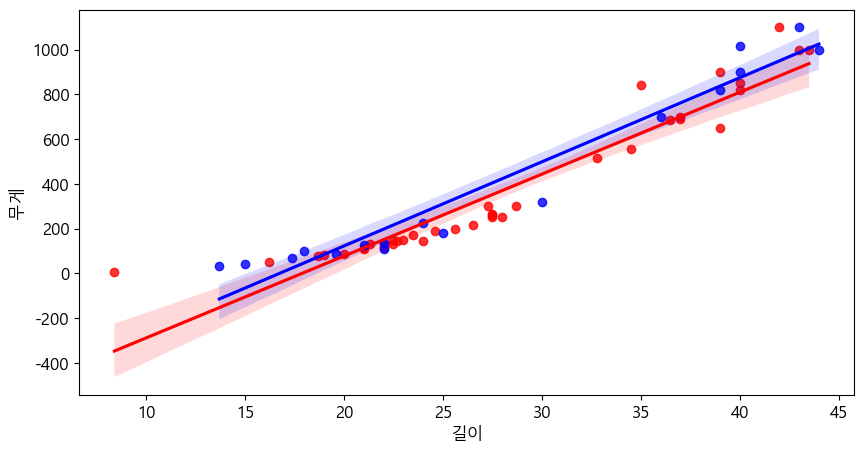

In [68]:
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

plt.figure(figsize=(10,5))

sb.regplot(x=x_train['길이'],y=y_train['무게'],color='red')
sb.regplot(x=x_test['길이'],y=y_test['무게'],color='blue')


## #04. 과적합

### 과소적합
분석 모델이 너무 단순해서 데이터의 구조를 제대로 학습하지 못할 경우

### 해결방법

- 모델 파라미터가 더 많은 모델을 선택
- 학습 알고리즘에 더 좋은 특성 제공
>  결국은 변수를 늘리라는 뜻 

### 과대적합

훈련 데이터에 있는 잡음의 양이 모델이 비해 너무 복합한 겨웅

설명력에 비해 잔차가 큰 경우라 할 수 있다. 

#### 해결방법
- 파라미터 수가 적은 모델을 선택
- 훈련 데이터의 특성의 수를 줄임
- 모델을 단순화 시킴

## #05. 다항회귀
데이터에 잘 맞는 일차 함수나 직선을 구하는 게 아니라 다항식이나 곡선을 구해서 학습하는 방법

하나의 입력변수에 대해 차수를 확장하여 다차원 회귀 모델을 도출한다. 



### 데이터 전처리

#### 훈련데이터의 독립변수 추가

In [56]:
x_train['길이^2'] =x_train['길이']**2
x_train.head()
 

,길이,길이^2
23,23.5,552.25
33,27.5,756.25
51,42.0,1764.00
29,26.5,702.25
0,8.4,70.56


In [57]:
x_test['길이^2'] =x_test['길이']**2
x_test.head()

,길이,길이^2
4,17.4,302.76
12,21.0,441.00
46,39.0,1521.00
49,40.0,1600.00
48,40.0,1600.00


### 분석


In [58]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

print("y = {0:.2f} * X + {1:.2f}".format(fit.coef_[0][0], fit.intercept_[0]))

계수:  [[-20.86841393   0.99310814]]
절편:  [106.74418301]
훈련 데이터 설명력:  0.9677435640250098
검증 데이터 설명력:  0.9791148173606097
y = -20.87 * X + 106.74


### 분석 결과 시각화

In [62]:
import numpy as np 


7.0 45.0


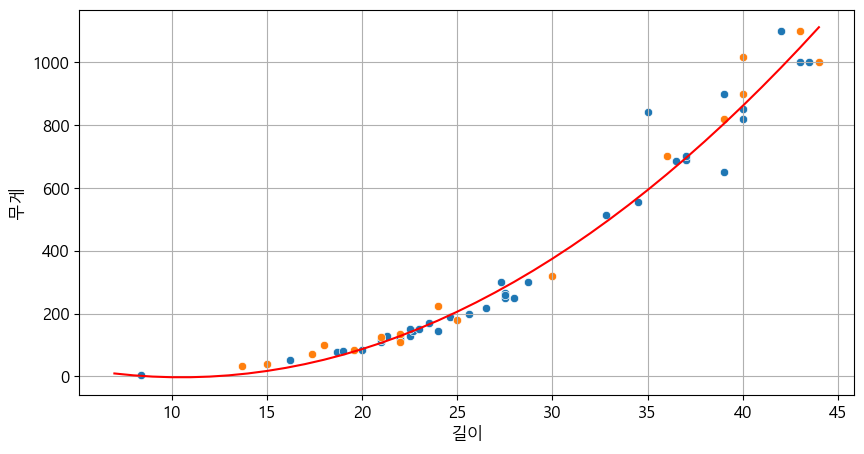

In [66]:

plt.figure(figsize=(10, 5))
sb.scatterplot(x=x_train['길이'], y=y_train['무게'])

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin,xmax = plt.xlim()
print(xmin.round(),xmax.round())
x_range = np.arange(xmin.round(),xmax.round(),1)
## y값에 대한 추정치
y_pred = x_range * fit.coef_[0][0] + x_range**2 * fit.coef_[0][1] + fit.intercept_[0]
#print(y_pred)
sb.scatterplot(x=x_test['길이'], y=y_test['무게'])
sb.lineplot(x=x_range, y=y_pred, color='red')

plt.grid()
plt.show()
plt.close()